In [1]:
from camelyonpatch import CamelyOnPatch
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np


This image in full Resolution is too large to fit in memory, but it doesn't mean we can't still use what we've learned to start analyzing it

# Reminder our Dataset

Instead of looking at the whole image we can look at one small piece say 96x96 pixels worth. 
* Ask are any of the pixels in the middle 32x32 cancerous
    * If yes label it with a 1
    * If no label it with a zero
    * Why only the middle 32x32 pixels
        * Allows network to have some context to understanding the center pixels
        * Otherwise one pixel in the top corner being cancerous would label the whole image cancerous
* This turns one picture into 1000s of trainning examples

* **Important Detail** about the data split
    * Having a lot of training examples is great
        * But what we really want to know is can we use this algorithm to identify tumors it hasn't seen before
        * The dataset used above splits the data by randomly assigning each tumor to a dataset rather than randomly assigning each image to a dataset
            * Make sure the model gernalizes to new tumors and not just those seen in the training set





## Using Our Image Dataset

We've placed a lot of small images in folders, how do we feed this to keras?
   * We'll use a data generator

# Python Generator

python has a neat concept called a generator that we can use in our ML models
* A function that generates data each time it is called
* Often a while loop the loops forever 
* uses the **yield** keyword
* Each new element can be grabbed with the next keyword


In [2]:
def five_random_numbers():
    while True:
        yield( np.random.uniform(size=5))
my_generator=five_random_numbers()

for i in range(10):
    print(next(my_generator))
    
    

[0.68002625 0.82878382 0.96783714 0.52529108 0.41866076]
[0.54538823 0.82569763 0.13920457 0.2929693  0.48955805]
[0.01478862 0.40881458 0.6776941  0.09675858 0.92872588]
[0.51430848 0.22039643 0.68929874 0.41386427 0.17894728]
[0.07384585 0.76615937 0.6719989  0.37304388 0.66684263]
[0.4183174  0.51693486 0.56188897 0.47331874 0.45179426]
[0.53527064 0.37921093 0.01312254 0.27519715 0.69242301]
[0.49141279 0.48849694 0.06045947 0.7148825  0.61388936]
[0.39969337 0.75632087 0.21580161 0.73352986 0.81529569]
[0.97642946 0.40835663 0.75483164 0.26478509 0.15567454]


# Give it a try
We'll use a generator to scan our input slide, try writing one that returns batch_sizex96x96x3 random images

`hint np.random.normal(size(batch_size,96x96x3))`

In [3]:
#def my_generator("Your code from here"

    
                 
                 

## Keras Image Data Generator

This is a built in generator like the one we used to scan our full slide, but it has the ability to change images on the fly, so no image you use in training is exactly the same.

```
keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0,
    width_shift_range=0.0, 
    height_shift_range=0.0, 
    brightness_range=None, 
    shear_range=0.0,
    zoom_range=0.0, 
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0, 
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None, 
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0, 
    dtype=None)
```

## Input

There are several ways of using this, but we're going to use raw (96x96x3) images stored in folders.
Classes are identifided in sub-folders

In [4]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255.,
            width_shift_range=0,  # randomly shift images horizontally
            height_shift_range=0,  # randomly shift images vertically 
            horizontal_flip=True,  # randomly flip images
            vertical_flip=True,
            shear_range=1,
            zoom_range=.05,
            rotation_range=15                           
            )  # randomly flip images
train_generator=data_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/train',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True)

develop_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255.,
            width_shift_range=0,  # randomly shift images horizontally
            height_shift_range=0,  # randomly shift images vertically 
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False,
            shear_range=0,
            zoom_range=.00,
            rotation_range=0                          
            )  # randomly flip images

develop_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/develop',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)

test_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/test',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)
     

Found 275278 images belonging to 2 classes.
Found 34302 images belonging to 2 classes.
Found 34297 images belonging to 2 classes.


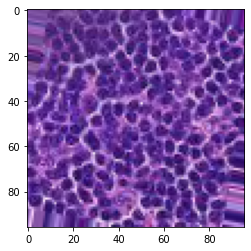

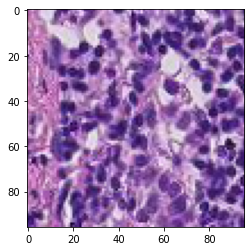

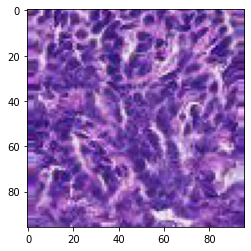

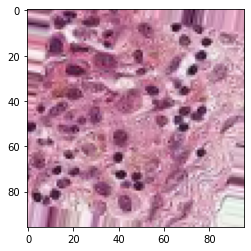

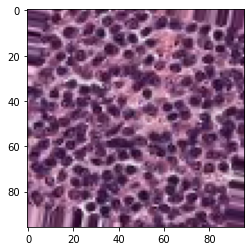

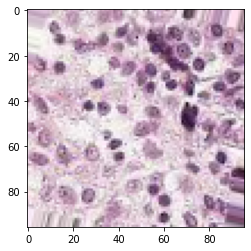

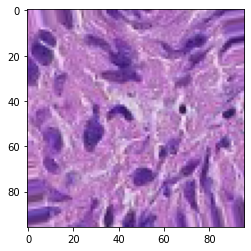

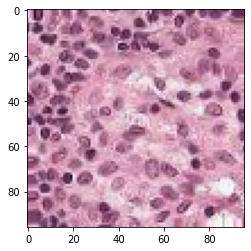

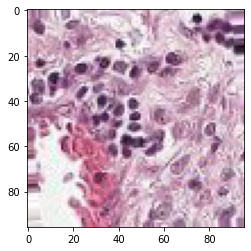

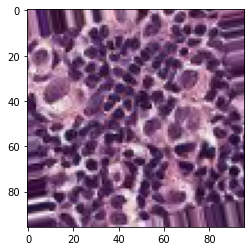

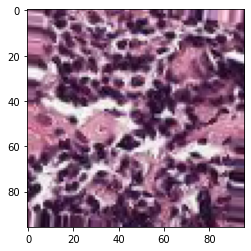

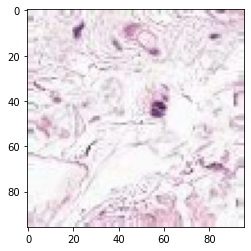

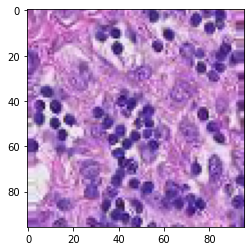

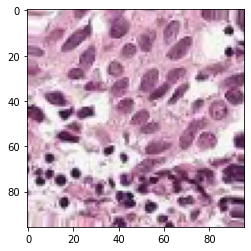

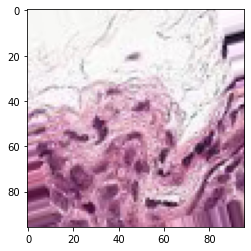

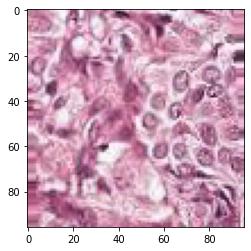

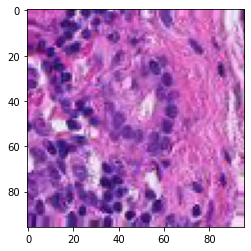

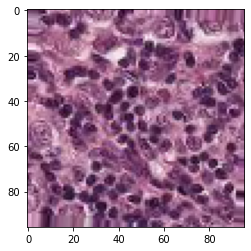

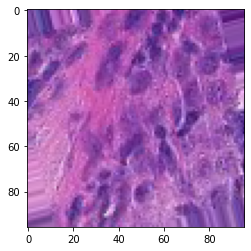

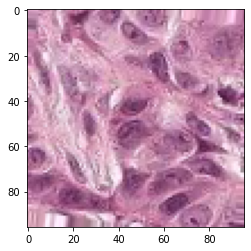

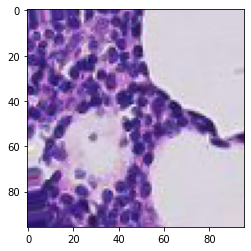

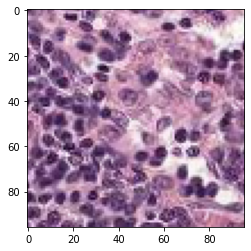

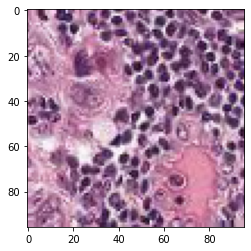

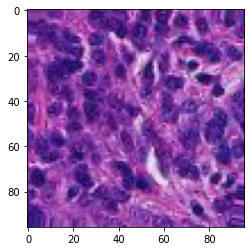

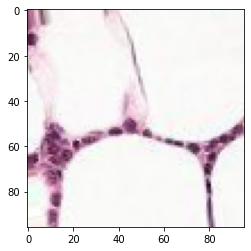

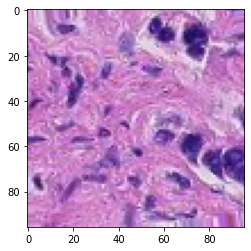

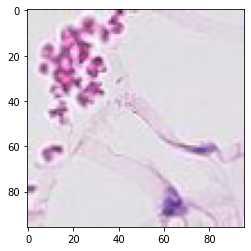

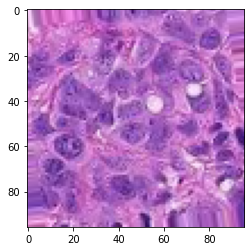

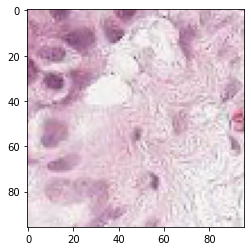

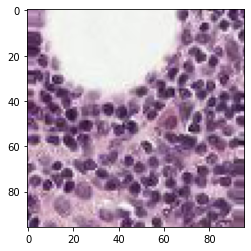

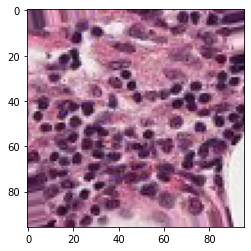

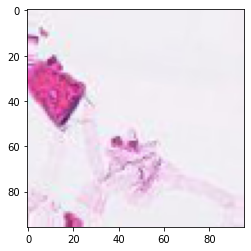

In [5]:
cpd_image,cpd_labels=next(train_generator)

for image in cpd_image:
    plt.imshow(image)
    plt.show()



# This is just like the examples from the last lecture, but with slightly larger images

## Exercise

Try writing your own model, and training it 
* Start with an input layer
* Add Convolutional layers
    * Remember to add an activation
* Downsample with either pooling or striding
* Make a keras model, call it **model**
    * compile the model including accuracy as a metric 
 




In [6]:
"Create your model here"

'Create your model here'

In [7]:
"Add model training code here"

'Add model training code here'

# Answer these Questions

* How many parameters were in your model?
* How long did an epoch take?
* What accuracy were you able to reach?





# My Simple CNN

* If you want to use your own model written above, go for it! (just skip the cell below)
* Otherwise use the network below

In [ ]:
ans=input("Are you sure you want to use my model? Y/N")
if ans.lower() == 'y':
    cnn_input=tf.keras.layers.Input( shape=(96,96,3) ) # Shape here does not including the batch size 
    cnn_layer1=tf.keras.layers.Convolution2D(64, (2,2),strides=2,padding='same')(cnn_input) 
    cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer1) 
    cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 

    cnn_layer2=tf.keras.layers.Convolution2D(126, (2,2),strides=2,padding='same')(cnn_activation) 
    cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer2) 
    cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 

    cnn_layer3=tf.keras.layers.Convolution2D(256, (2,2),strides=2,padding='same')(cnn_activation) 
    cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer3) 
    cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 


    flat=tf.keras.layers.Flatten()(cnn_activation) 

    drop=tf.keras.layers.Dropout(0.3)(flat) 

    dense_layer=tf.keras.layers.Dense(1)(drop) 
    output=tf.keras.layers.Activation('sigmoid')(dense_layer)

    model=tf.keras.models.Model([cnn_input],[output])
    model.summary()


    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.load_weights('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/cnn_1.h5')

    if False:
        history=model.fit(cpd.X_train, cpd.Y_train, 
              batch_size=100, epochs=10, verbose=1,
             validation_data=(cpd.X_develop,cpd.Y_develop),
                      shuffle='batch'
             )
        model.save_weights('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/cnn_1.h5')\



# Make a plot of our predictions

Let's check to see how well our model is working
 * We'll look at the same histogram we did in previous lectures



In [ ]:
y_pred=np.squeeze(model.predict_generator(develop_generator))
y_develop=develop_generator.classes[0:len(y_pred)]
print("done")


In [ ]:
develop_generator.classes.shape

In [ ]:
f=plt.figure(figsize=(10,10))
tumor=[pred for pred,truth in zip(y_pred,y_develop) if truth  ]
fine=[pred for pred,truth in zip(y_pred,y_develop) if not truth  ]

plt.hist(tumor,range=(0,1),bins=200,density=True,histtype='step',label='Tumor')  
plt.hist(fine,range=(0,1),bins=200,density=True,histtype='step',label='Normal')
plt.xlabel('Neural Network Response')
plt.ylabel('Number of Images')
plt.legend()
plt.show()


# Hopefully there is a clear separation between tumor and normal

## Is it good enough?

In order to answer this question it's important to decide how we want to use it

**Goal**: Assist in diagnosis by highlighting potential tumors.

Let's see if it's good enough by giving it a try









# --- BREAK ----

# Using our model

We will use open-slide to grab 96x96x3 pixel chunks and feed them to our model

Our training Data was split into 96x96 pixel images at level-2
 * Let's check to make sure that's not crazy

In [ ]:
import openslide
tiff_file='/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif'
slide_image=openslide.OpenSlide(tiff_file)
# This is the resolution at level 2
initial_dimension=slide_image.level_dimensions[2]

# This is the resolution after we've turned each 32x32 pixel box into a predictions
final_dimension= np.array(initial_dimension)/32.

print("prescan dimension",initial_dimension,"final scan",final_dimension)
n_predictions=np.product(final_dimension)
print(n_predictions/1e6," Million Predictions Required")


# This is a lot of predictions

It's possible to do the whole slide, but it takes awhile (30 minutes or so...) let's try a smaller section

In [ ]:


#These coordinates are at level 0
width=6400
height=6400

x_start=60000
y_start=120000




print("Predictions Required",width//32*height//32)


#Covert these for later use to level2
level0_dimension=slide_image.level_dimensions[0]
level2_dimension=slide_image.level_dimensions[2]

sfactor_x=level0_dimension[0]/level2_dimension[0]
sfactor_y=level0_dimension[1]/level2_dimension[1]

x_stop=x_start+width*4
y_stop=y_start+height*4


print('Scaling factor to level 2',sfactor_x,sfactor_y)

# It's just a factor of 4
f=plt.figure(figsize=(50,50))
plt.imshow(slide_image.read_region( (x_start,y_start),2,(height,width)))
plt.show()


### Not bad - let's scan this image
How can we feed this to our model?


# A Generator to load our data

In [ ]:

def scan_image(image_file,batch_size,x_range,y_range):
    slide_image=openslide.OpenSlide(image_file)
    res_x,res_y=slide_image.level_dimensions[2]
    
    coord_x,coord_y=slide_image.level_dimensions[0] 
    #This is factor we need to scale the pixels at resolution 2 to the coordinates in resolution 0

    sfactor_x=coord_x/res_x  
    sfactor_y=coord_y/res_y 
    
    batch=[]
    index=0
    for x in range(x_range[0]//4,x_range[1]//4,32):
        for y in range(y_range[0]//4,y_range[1]//4,32):
            image=np.asarray(slide_image.read_region( (int(x*sfactor_x),int(y*sfactor_y)),2,(96,96)  ))/255.
            batch.append(np.expand_dims(image[:,:,0:3],0))                                
            if len(batch)==batch_size:
                yield(np.concatenate(batch,0))
                batch=[]

In [ ]:
batch_size=10
x_range=[x_start,x_stop]
y_range=[y_start,y_stop]

n_predictions=width//32*height//32
steps=n_predictions//batch_size

generator=scan_image('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif',batch_size,x_range,y_range)
steps=n_predictions//batch_size

output_scan=model.predict_generator(generator,steps)
output_map=np.zeros((height//32,width//32))
print(output_scan)
for index,v in enumerate(output_scan):
    
    y=index%(width//32)
    x=index//(width//32)
    output_map[y,x]=v
    
plt.imshow(output_map)
plt.show()

## These are probabilites
Let's check which are greater than 50%



In [ ]:
f=plt.figure(figsize=(2,2))
plt.imshow(output_map > 0.7)
plt.show()

## Practice Manipulating Data

1. Use Open Slide to find the coordinates of a different region of cells
2. Use the coordinates, The generator code above, and our model to predict a new region
3. What diagnosis would you make (or would you?)

# Hmmm
The full slide looks like this (as you can guess from the file name it has a tumor)
<img src='../assets/full_slide_scan_1.png'>

But wait a slide without a tumor looks like this

<img src='../assets/full_slide_scan_normal.png'>


The results above don't look great, lots of likely Tumors even in places without cells!

* Our training data didn't include things like slide edges and slide area's without tissues
    * The results on these can be fairly random
* A bigger issue is a problem with statistics

* Remember we are approximating    
    $P(y|x)$

* Which using Bayes’ theorem

    $P(y|x)=\frac{P(x|y)P(y)}{P(x)}$

* What is P(y) in our dataset?
    * This the probability an image contained at least one tumor pixel
    * Our dataset was artifically built so $P(y=tumor)=1/2$ and $P(y=healthy)=1/2$
        * This makes training easier
        * This is called class Balancing
    * However, looking at cells in the wild it is vastly more likely that they are non-cancerous
* How do we use these predictions?
    * We know $P(y)$ is quite a bit smaller in the real world
    * We $P(y|x)$ is porportional to $P(y)$
        * The real world $P(y|x)$ is smaller than the one measured in our experiment
    * An easy way to reduce false positives is to increase the threshold we used from 50% to something larger
        * How high is a judgment cell
        * Too high could miss tumors
        * Too low and there are fake tumors everywhere
    

    



In [ ]:
for threshhold in [0.5,0.7,0.8,0.9,0.95,0.99]:    
    print('Threshhold',threshhold)
    f=plt.figure(figsize=(5,12))
    plt.imshow(output_map > threshhold)
    plt.show()

# How confident would you be in this diagnosis?

Probably not very, so let's try to do better

# Improving our models





In [ ]:
!ls /projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/*


In [ ]:
aug_images,aug_label=next(train_generator)

In [ ]:
plt.imshow(aug_images[25])
print(aug_label)
print(aug_images)
np.max(aug_images[1])

In [ ]:
model.load_weights('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/cnn_2.h5')
if False:
    
    model.fit_generator(train_generator,steps_per_epoch=1000,epochs=10,validation_data=(cpd.X_develop,cpd.Y_develop),
)
    model.save_weights('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/cnn_2.h5')

In [ ]:
batch_size=10
x_range=[x_start,x_stop]
y_range=[y_start,y_stop]

n_predictions=width//32*height//32
steps=n_predictions//batch_size

generator=scan_image('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif',batch_size,x_range,y_range)
steps=n_predictions//batch_size

output_scan=model.predict_generator(generator,steps)
output_map=np.zeros((height//32,width//32))
print(output_scan)
for index,v in enumerate(output_scan):
    
    y=index%(width//32)
    x=index//(width//32)
    output_map[y,x]=v
    
plt.imshow(output_map)
plt.show()

In [ ]:

print(output_map.shape)
print(final_dimension)
f=plt.figure(figsize=(10,30))
plt.imshow(output_map>0.5)
plt.show()

## A bit better


We can make the model better by adding layers, better data augmentation,
trying out tricks we find on stack overflow. There's a better way.


# Don't be a Hero
Sometimes a simple model is all you need, but when you want to do the best you can, you can use an existing model made by an ML research team, and trained on very large image datasets.


https://keras.io/applications/

|Model 	 |    Size |	Top-1 Accuracy|	Top-5 Accuracy |	Parameters |	Depth|
|----|----|----|----|----|----|
|Xception|88 MB |	0.790         | 	0.945|   22,910,480|     	126|
|VGG16 	     |       528 MB |	0.713| 	0.901| 	138,357,544| 	23      
|VGG19 	      |      549 MB |	0.713| 	0.900| 	143,667,240| 	26
|ResNet50 	   |     98 MB 	|0.749| 	0.921| 	25,636,712| 	-
|ResNet101 	    |    171 MB |	0.764| 	0.928| 	44,707,176| 	-
|ResNet152 	     |   232 MB |	0.766| 	0.931|	60,419,944| 	-
|ResNet50V2 	      |  98 MB 	|0.760| 0.930| 	25,613,800| 	-
|ResNet101V2        | 171 MB |	0.772| 	0.938| 	44,675,560| 	-
|ResNet152V2         |232 MB |	0.780| 	0.942| 	60,380,648| 	-
|ResNeXt50 	|        96 MB 	|0.777| 	0.938| 	25,097,128| 	-
|ResNeXt101 	 |       170 MB |0.787| 0.943| 	44,315,560| 	-
|InceptionV3   |      92 MB 	|0.779| 0.937| 	23,851,784| 	159
|InceptionResNetV2| 	215 MB 	|0.803| 0.953| 	55,873,736| 	572
|MobileNet 	   |     6 MB 	|0.704| 	0.895| 	4,253,864| 	88
|MobileNetV2 |	    14 MB 	|0.713| 	0.901| 	3,538,984| 	88
|DenseNet121 |	    33 MB 	|0.750| 	0.923| 	8,062,504| 	121
|DenseNet169 |	    57 MB 	|0.762| 	0.932| 	14,307,880| 	169
|DenseNet201 |	    80 MB 	|0.773| 	0.936|	20,242,984| 	201
|NASNetMobile |	    23 MB 	|0.744| 	0.919| 	5,326,716| 	-
|NASNetLarge |	343 MB 	    |0.825| 	0.960| 	88,949,818| 	-



# Example VGG16

<img src=https://neurohive.io/wp-content/uploads/2018/11/vgg16.png>

This model was trained on ImageNet (http://www.image-net.org/)
* Classification of a thousand of different objects, and trained with Millions of images
* We want to take all those pre-trained weights and use them in our cancer example


Remember from the models we wrote
   * We have a stack of Convolutional Layers
   * Flatten Layer
   * Dense Layer(s) to make predictions

Since the classification is only at the end, we can just remove it
   * In the figure above these are all the layers in green
   * We can replace it with new layers

You'll hear this called **transfer learning**, because we're using the features learned from ImageNet to do classification on our data.

**Important** we've been scaling our images from 0-1 by dividing by 255. This isn't the way it's always done, and if you don't use the right image pre-processing functions for the model you're using you might get meaningful looking results but ones that are very sub-optimal.






## The Code

In [ ]:
#pre_trained=tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_tensor=None, input_shape=(96,96,3), pooling=None)

#Load a pretrained model

#set include_top to false this removes the dense layers at the end
pre_trained=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_tensor=None, input_shape=(96,96,3), pooling=None)
preprocessing=tf.keras.applications.vgg16.preprocess_input


# fix all these layers so we don't train them right away
for l in pre_trained.layers:
    l.trainable=False


# Add our own new Dense Layers    
flat=tf.keras.layers.Flatten()(pre_trained.output)
top=tf.keras.layers.Dense(256)(flat)
top=tf.keras.layers.LeakyReLU()(top)
top=tf.keras.layers.Dropout(0.3)(top)

classification=tf.keras.layers.Dense(1,activation='sigmoid')(top)

# Model/compile like before


model=tf.keras.models.Model([pre_trained.input],classification)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

We'll make generators like before but now using the preprocessing function

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=preprocessing,
            width_shift_range=0,  # randomly shift images horizontally
            height_shift_range=0,  # randomly shift images vertically 
            horizontal_flip=True,  # randomly flip images
            vertical_flip=True,
            shear_range=1,
            zoom_range=.05,
            rotation_range=15                           
            )  # randomly flip images

train_generator=data_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/train',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True)

develop_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=preprocessing,
            width_shift_range=0,  # don't do anything but preprocess
            height_shift_range=0,  
            horizontal_flip=False,  
            vertical_flip=False,
            shear_range=0,
            zoom_range=.00,
            rotation_range=0                          
            )  # randomly flip images

develop_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/develop',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)

test_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/test',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)
     




In [ ]:
try_fit = True

if try_fit:
    history=model.fit_generator(train_generator,steps_per_epoch=1000,epochs=5,validation_data=develop_generator,validation_steps=100)


In [ ]:
if try_fit:
    for l in pre_trained.layers:
        l.trainable=True
    
    # You must! recompile after freezing layers
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

    model.fit_generator(train_generator,steps_per_epoch=1000,epochs=10,validation_data=develop_generator)


In [ ]:
if not try_fit:
    model.load_weights('/projects/bgmp/shared/2019_ML_workshop/VGG16.png')

In [ ]:
y_true=np.squeeze(develop_generator.classes)
y_pred=np.squeeze(model.predict_generator(develop_generator))

fine=[pred for pred,truth in zip(y_pred,y_true) if not truth  ]
tumor=[pred for pred,truth in zip(y_pred,y_true) if  truth  ]

plt.hist(tumor,range=(0,1),bins=200,density=True,histtype='step',label='tumor')
plt.hist(fine,range=(0,1),bins=200,density=True,histtype='step',label='normal')
plt.legend()
plt.show()

In [ ]:

def scan_image(image_file,batch_size,x_range,y_range,preprocessing_function):
    slide_image=openslide.OpenSlide(image_file)
    res_x,res_y=slide_image.level_dimensions[2]
    
    coord_x,coord_y=slide_image.level_dimensions[0] 
    #This is factor we need to scale the pixels at resolution 2 to the coordinates in resolution 0

    sfactor_x=coord_x/res_x  
    sfactor_y=coord_y/res_y 
    
    batch=[]
    index=0
    for x in range(x_range[0]//4,x_range[1]//4,32):
        for y in range(y_range[0]//4,y_range[1]//4,32):
            image=np.asarray(slide_image.read_region( (int(x*sfactor_x),int(y*sfactor_y)),2,(96,96)  ))
            batch.append( preprocessing_function(np.expand_dims(image[:,:,0:3],0))  )                                

            if len(batch)==batch_size:
                yield(np.concatenate(batch,0))
                batch=[]


In [ ]:
batch_size=10
x_range=[x_start,x_stop]
y_range=[y_start,y_stop]

n_predictions=width//32*height//32
steps=n_predictions//batch_size

generator=scan_image('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif',batch_size,x_range,y_range,preprocessing)
steps=n_predictions//batch_size

output_scan=model.predict_generator(generator,steps)
output_map=np.zeros((height//32,width//32))
print(output_scan)
for index,v in enumerate(output_scan):
    
    y=index%(width//32)
    x=index//(width//32)
    output_map[y,x]=v
    

    

plt.imshow(output_map)
plt.show()

# Full Slides 

This slide with a tumor

<img src="../assets/full_slide_scan_vgg16.png">

A slide with no tumor

<img src="../assets/full_slide_scan_vgg16_normal.png">

## Looking a lot better

Still some false positives along the slide/cell edges
* We could try to harvest more of that data
* Or we could institute a policy
    * Don't use the model for cell on the edge of a slide
* A human will make the diagnosis and the better the model the faster and more reliable it will be
* How did our model do?

# Where is the tumor?

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.xml')
root = tree.getroot()

tumor_coords=[(float(el.attrib['X']),float(el.attrib['Y'])) for el in root.findall('Annotations/Annotation/Coordinates/Coordinate')]

In [ ]:
tumor_x=[(x-x_start)/4./32.-2 for x,y in tumor_coords]
tumor_y=[(y-y_start)/4./32.-2 for x,y in tumor_coords]
f=plt.figure(figsize=(30,30))
plt.imshow(output_map)
plt.scatter(tumor_x,tumor_y)

f=plt.figure(figsize=(30,30))
plt.imshow(slide_image.read_region( (x_start,y_start),2,(height,width)))
tumor_x=[(x-x_start)/4. for x,y in tumor_coords]
tumor_y=[(y-y_start)/4. for x,y in tumor_coords]
plt.scatter(tumor_x,tumor_y)
plt.show()



# We did highlight both tumors, but we also highlighed a different area of cells

* Group Question, how would you try and fix this issue?




# Can you do even better?

Give it a try with a different pretrained model

# Summary for using existing models

* Be careful not to 'blow up' existing well trained weights
* Train the dense layers first classifier
* Fine-Tune  other layers (use small learning rates)
* don't overfit! 
